# **Proyecto 1 C2**

*   Daniel Bernal

## **Parte 1**

El objetivo de esta parte es construir un modelo de regresión que permita estimar el precio de alquiler para una nueva
ubicación. Para cumplir este objetivo se relaizaran los siguietes pasos:

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder, OrdinalEncoder
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import roc_curve, auc, r2_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [ ]:
df1 = pd.read_csv('airbnb.csv')
df1

,accommodates,bedrooms,bathrooms,beds,price,cleaning_fee,security_deposit,minimum_nights,maximum_nights,number_of_reviews
0,4,1.0,1.0,2.0,$160.00,$115.00,$100.00,1,1125,0
1,6,3.0,3.0,3.0,$350.00,$100.00,NaN,2,30,65
2,1,1.0,2.0,1.0,$50.00,NaN,NaN,2,1125,1
3,2,1.0,1.0,1.0,$95.00,NaN,NaN,1,1125,0
4,4,1.0,1.0,1.0,$50.00,$15.00,$450.00,7,1125,0
...,...,...,...,...,...,...,...,...,...,...
3718,4,1.0,1.0,2.0,$135.00,$45.00,$400.00,3,60,19
3719,2,1.0,2.0,1.0,$79.00,NaN,NaN,3,365,36
3720,6,2.0,1.0,3.0,$275.00,$100.00,$500.00,2,2147483647,12
3721,2,1.0,1.0,1.0,$179.00,$25.00,NaN,2,21,48


In [ ]:
#Verificamos el tipo de dato de cada una de las columnas
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3723 entries, 0 to 3722
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   accommodates       3723 non-null   int64  
 1   bedrooms           3702 non-null   float64
 2   bathrooms          3696 non-null   float64
 3   beds               3712 non-null   float64
 4   price              3723 non-null   object 
 5   cleaning_fee       2335 non-null   object 
 6   security_deposit   1426 non-null   object 
 7   minimum_nights     3723 non-null   int64  
 8   maximum_nights     3723 non-null   int64  
 9   number_of_reviews  3723 non-null   int64  
dtypes: float64(3), int64(4), object(3)
memory usage: 291.0+ KB


In [ ]:
#Verificamos cuales de las columnas tienen datos nulos
df1.isnull().sum()

,0
accommodates,0
bedrooms,21
bathrooms,27
beds,11
price,0
cleaning_fee,1388
security_deposit,2297
minimum_nights,0
maximum_nights,0
number_of_reviews,0


In [ ]:
#Cambiamos las columnas para que puedan ser operadas respectivamente quitandole el signo pesos los puntos y las comas por ultimo se castea a float
df1['accommodates'] = df1['accommodates'].astype('float64')
df1['price'] = df1['price'].str.replace('$', '')
df1['price'] = df1['price'].str.replace('.', '')
df1['price'] = df1['price'].str.replace(',', '')
df1['price'] = df1['price'].astype(float)

In [ ]:
df1['cleaning_fee']=df1['cleaning_fee'].str.replace('$','')
df1['cleaning_fee']=df1['cleaning_fee'].str.replace('.','')
df1['cleaning_fee']=df1['cleaning_fee'].str.replace(',','')
df1['cleaning_fee']=df1['cleaning_fee'].astype(float)

In [ ]:
df1

,accommodates,bedrooms,bathrooms,beds,price,cleaning_fee,security_deposit,minimum_nights,maximum_nights,number_of_reviews
0,4.0,1.0,1.0,2.0,16000.0,11500.0,$100.00,1,1125,0
1,6.0,3.0,3.0,3.0,35000.0,10000.0,NaN,2,30,65
2,1.0,1.0,2.0,1.0,5000.0,NaN,NaN,2,1125,1
3,2.0,1.0,1.0,1.0,9500.0,NaN,NaN,1,1125,0
4,4.0,1.0,1.0,1.0,5000.0,1500.0,$450.00,7,1125,0
...,...,...,...,...,...,...,...,...,...,...
3718,4.0,1.0,1.0,2.0,13500.0,4500.0,$400.00,3,60,19
3719,2.0,1.0,2.0,1.0,7900.0,NaN,NaN,3,365,36
3720,6.0,2.0,1.0,3.0,27500.0,10000.0,$500.00,2,2147483647,12
3721,2.0,1.0,1.0,1.0,17900.0,2500.0,NaN,2,21,48


In [ ]:
#Eliminamos la columna security_deposit debido a que tenian alrededor del 60% de los datos como nan
df1.drop(columns=['security_deposit'], inplace=True)

In [ ]:
df1

,accommodates,bedrooms,bathrooms,beds,price,cleaning_fee,minimum_nights,maximum_nights,number_of_reviews
0,4.0,1.0,1.0,2.0,16000.0,11500.0,1,1125,0
1,6.0,3.0,3.0,3.0,35000.0,10000.0,2,30,65
2,1.0,1.0,2.0,1.0,5000.0,NaN,2,1125,1
3,2.0,1.0,1.0,1.0,9500.0,NaN,1,1125,0
4,4.0,1.0,1.0,1.0,5000.0,1500.0,7,1125,0
...,...,...,...,...,...,...,...,...,...
3718,4.0,1.0,1.0,2.0,13500.0,4500.0,3,60,19
3719,2.0,1.0,2.0,1.0,7900.0,NaN,3,365,36
3720,6.0,2.0,1.0,3.0,27500.0,10000.0,2,2147483647,12
3721,2.0,1.0,1.0,1.0,17900.0,2500.0,2,21,48


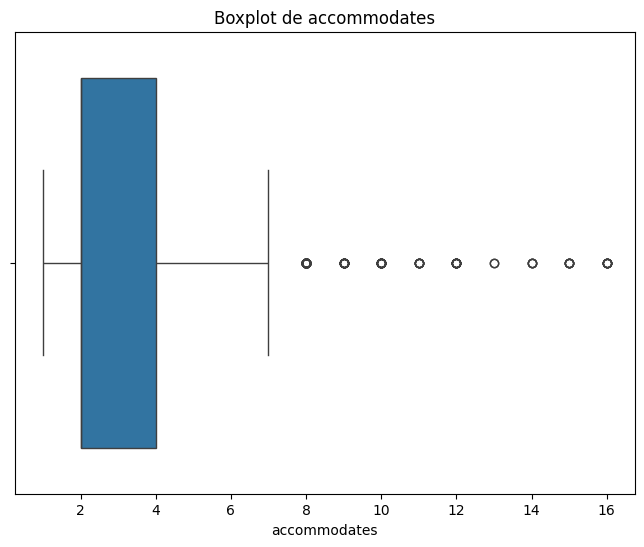

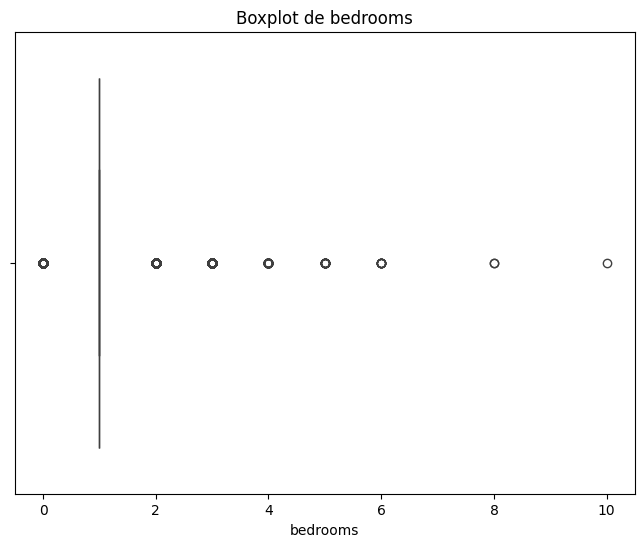

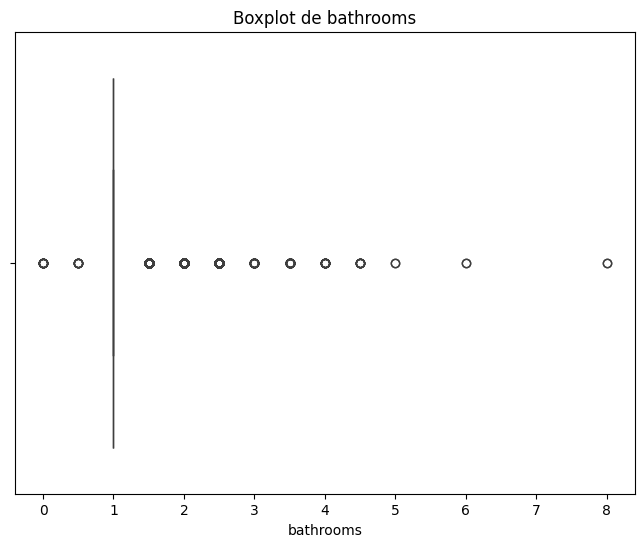

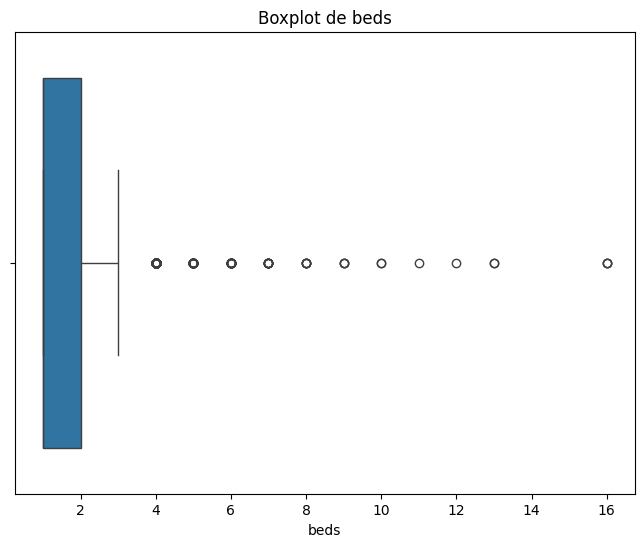

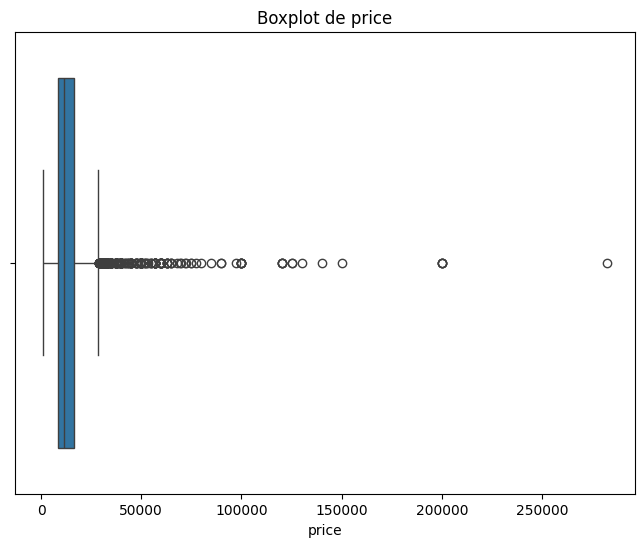

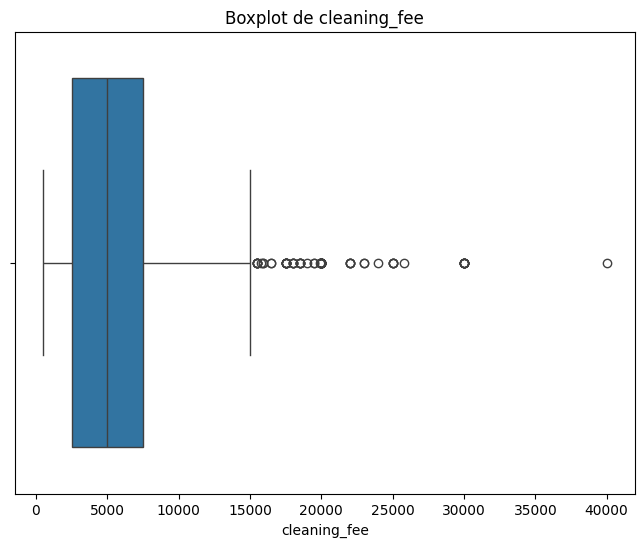

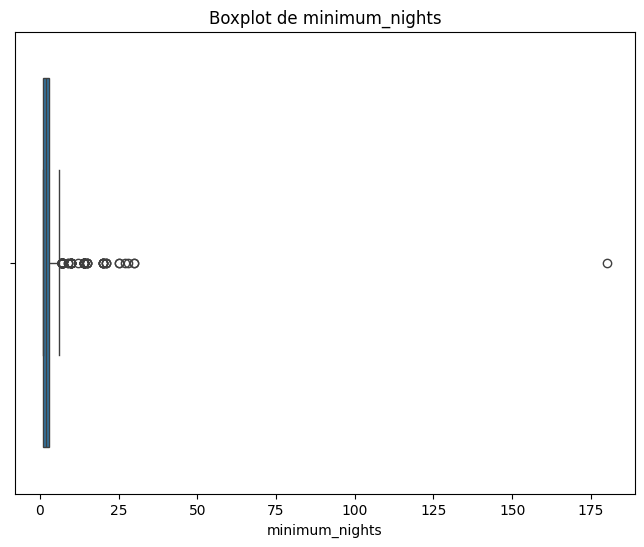

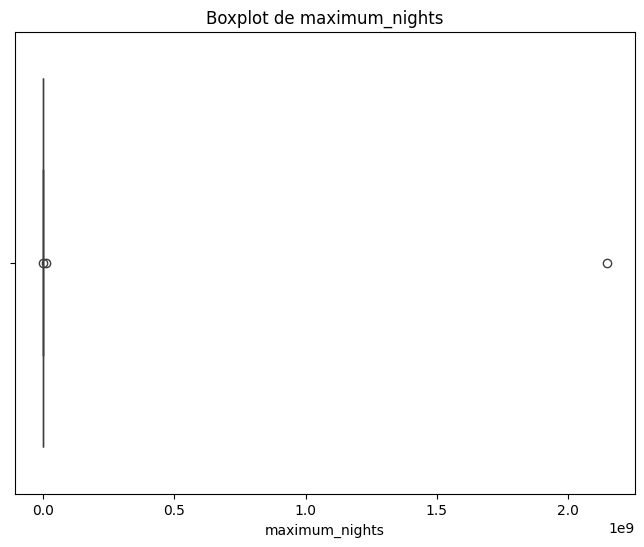

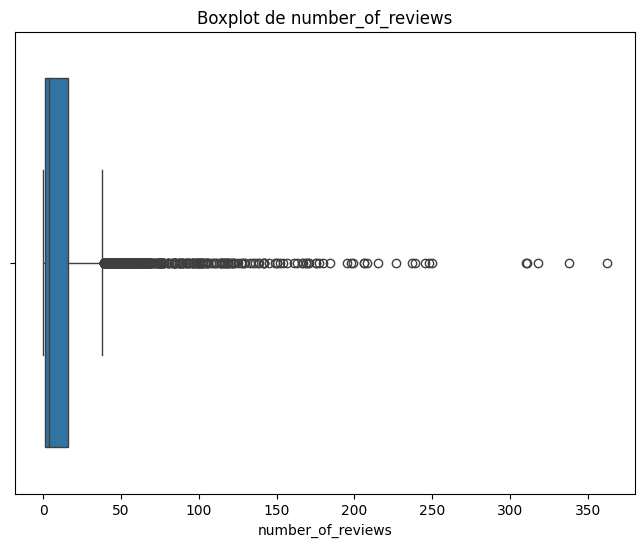

In [ ]:
#Se hace un boxplot para verificar la distribucion de los datos buscando los outliers dependiendo el contexto
for column in df1.select_dtypes(include=np.number):
  plt.figure(figsize=(8, 6))
  sns.boxplot(x=df1[column])
  plt.title(f'Boxplot de {column}')
  plt.show()

In [ ]:
#Se establece el valor maximo para la columna maximun_nights con base al boxplot y se filtran
df1 = df1[df1['maximum_nights'] < 100000]

In [ ]:
#Verificamos el valor max de la columna filtrada
df1['maximum_nights'].max()

2000

In [ ]:
df1

,accommodates,bedrooms,bathrooms,beds,price,cleaning_fee,minimum_nights,maximum_nights,number_of_reviews
0,4.0,1.0,1.0,2.0,16000.0,11500.0,1,1125,0
1,6.0,3.0,3.0,3.0,35000.0,10000.0,2,30,65
2,1.0,1.0,2.0,1.0,5000.0,NaN,2,1125,1
3,2.0,1.0,1.0,1.0,9500.0,NaN,1,1125,0
4,4.0,1.0,1.0,1.0,5000.0,1500.0,7,1125,0
...,...,...,...,...,...,...,...,...,...
3717,7.0,3.0,2.0,3.0,28500.0,12000.0,2,1125,8
3718,4.0,1.0,1.0,2.0,13500.0,4500.0,3,60,19
3719,2.0,1.0,2.0,1.0,7900.0,NaN,3,365,36
3721,2.0,1.0,1.0,1.0,17900.0,2500.0,2,21,48


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3720 entries, 0 to 3722
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   accommodates       3720 non-null   float64
 1   bedrooms           3699 non-null   float64
 2   bathrooms          3693 non-null   float64
 3   beds               3709 non-null   float64
 4   price              3720 non-null   float64
 5   cleaning_fee       2332 non-null   float64
 6   minimum_nights     3720 non-null   int64  
 7   maximum_nights     3720 non-null   int64  
 8   number_of_reviews  3720 non-null   int64  
dtypes: float64(6), int64(3)
memory usage: 290.6 KB


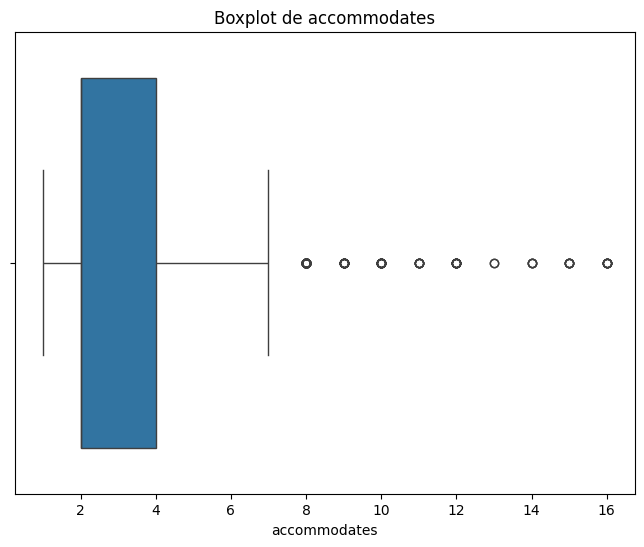

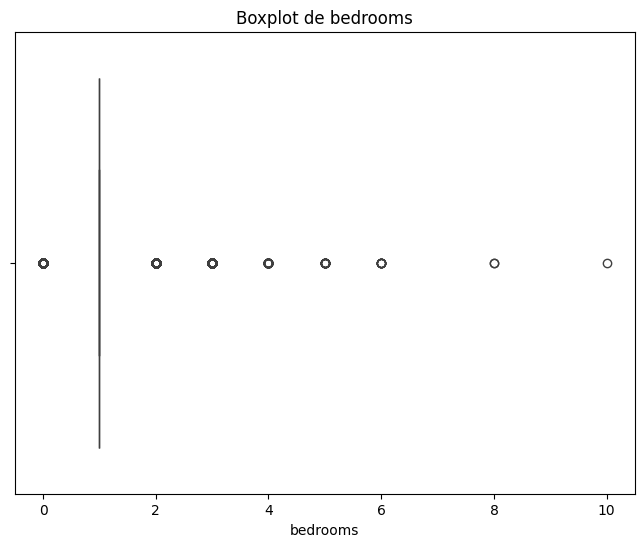

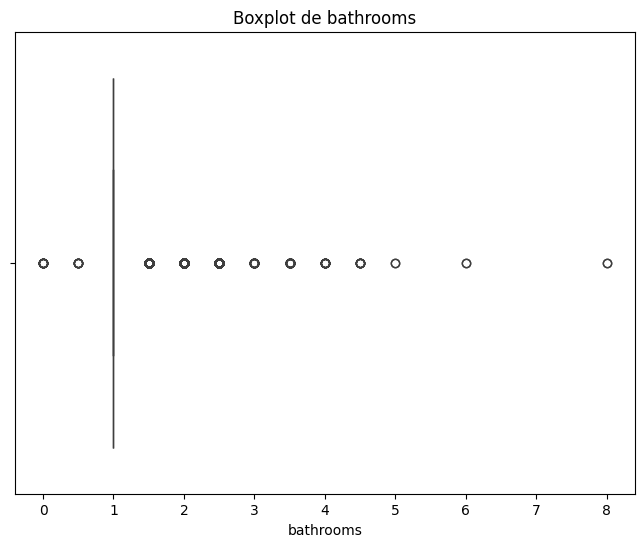

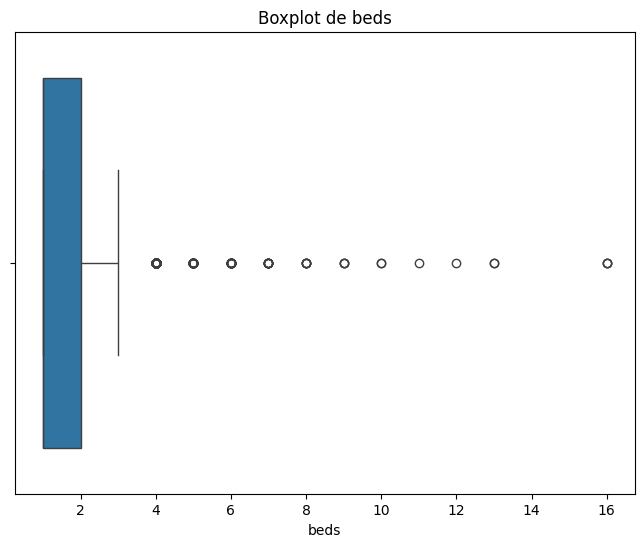

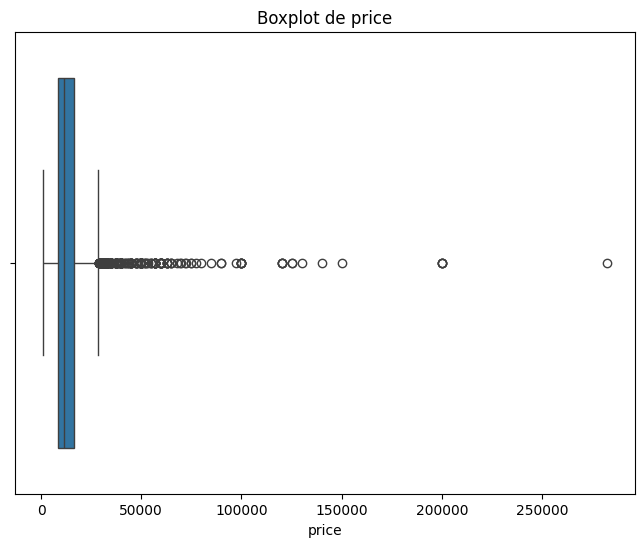

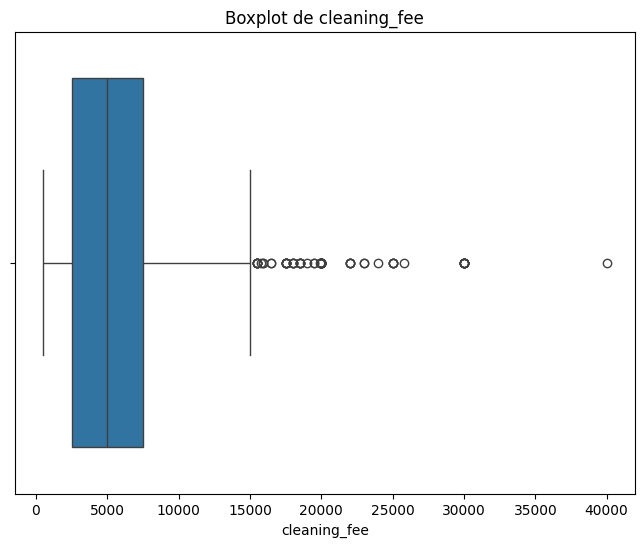

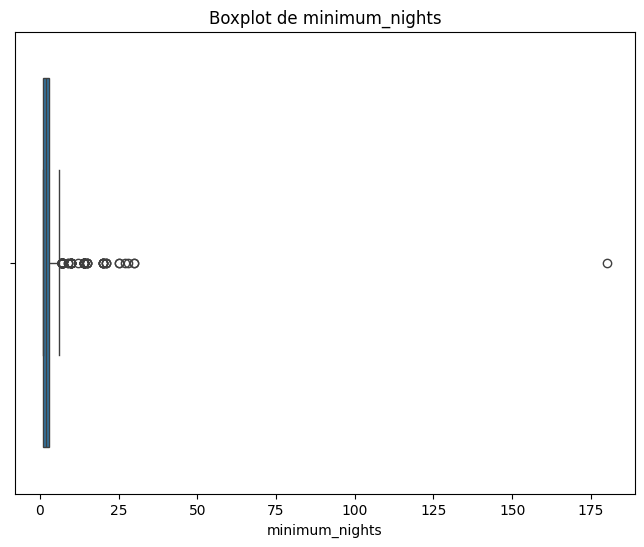

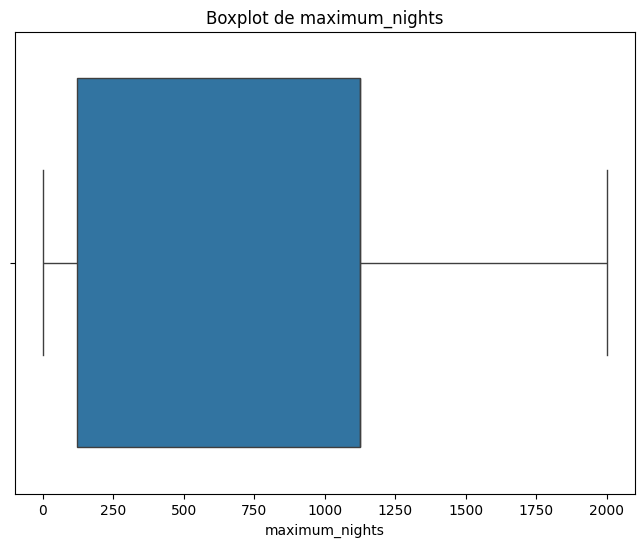

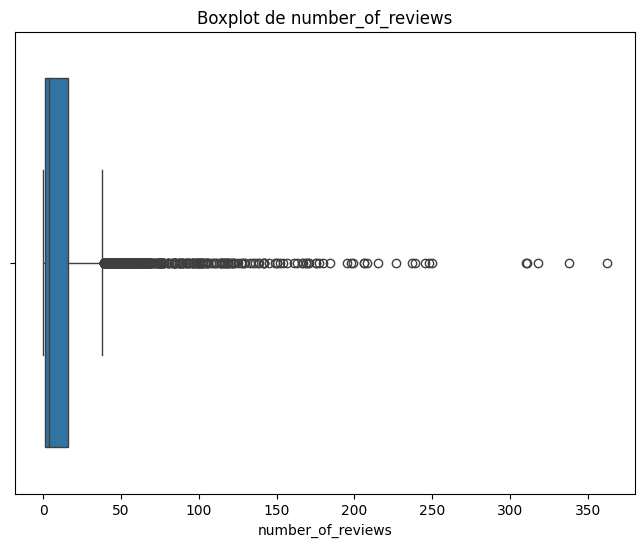

In [ ]:
#Verificamos nuevamente los outliers
for column in df1.select_dtypes(include=np.number):
  plt.figure(figsize=(8, 6))
  sns.boxplot(x=df1[column])
  plt.title(f'Boxplot de {column}')
  plt.show()

In [ ]:
#Dividimos los datos en train y test estableciendo el 30% de los datos para test
train, test = train_test_split(df1, test_size=0.3, random_state=42)

In [ ]:
#Verificamos el tamaño de los datos
print("Train size: {f}".format(f=train.shape[0]))
print("Test size: {t}".format(t=test.shape[0]))

Train size: 2604
Test size: 1116


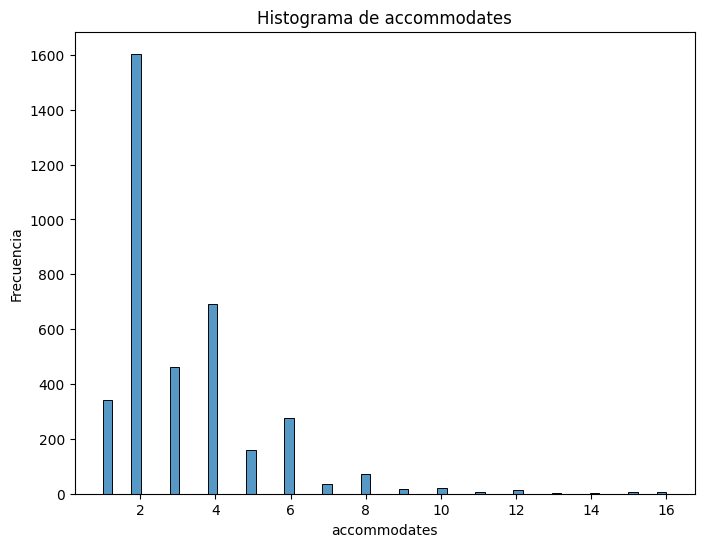

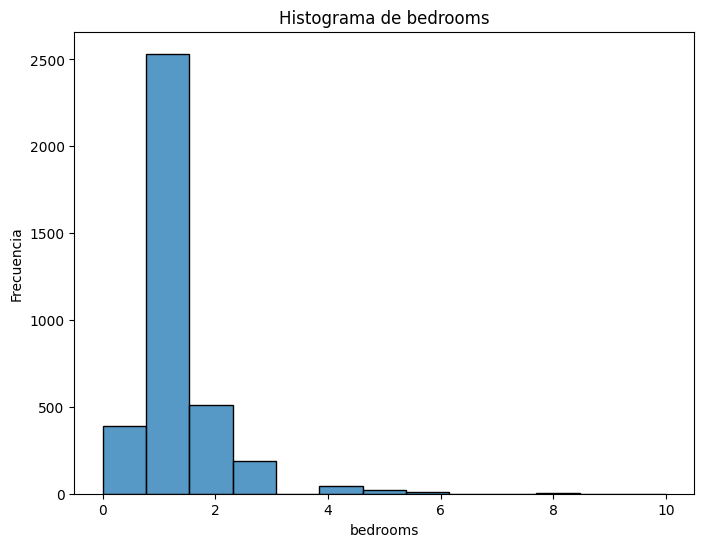

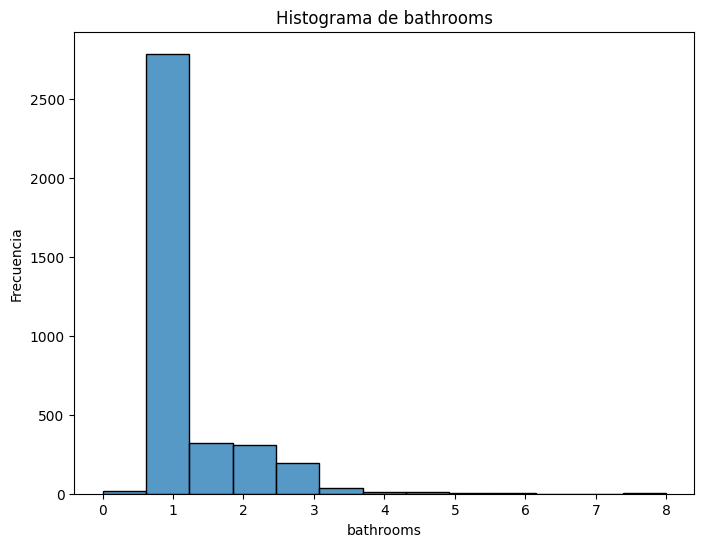

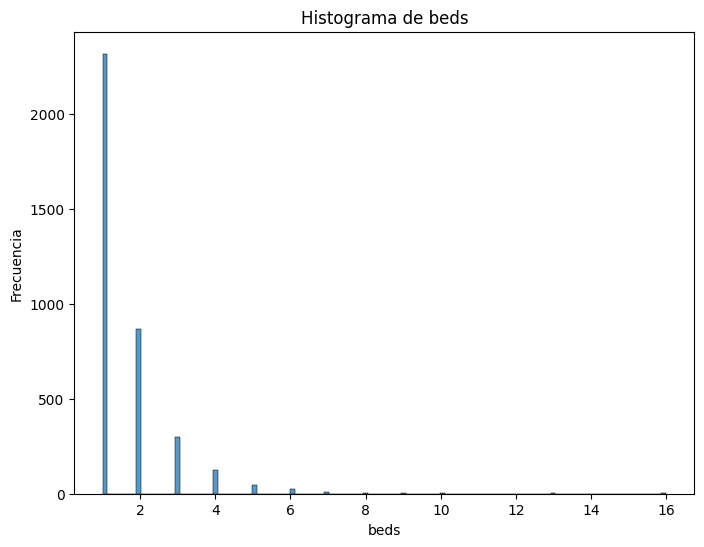

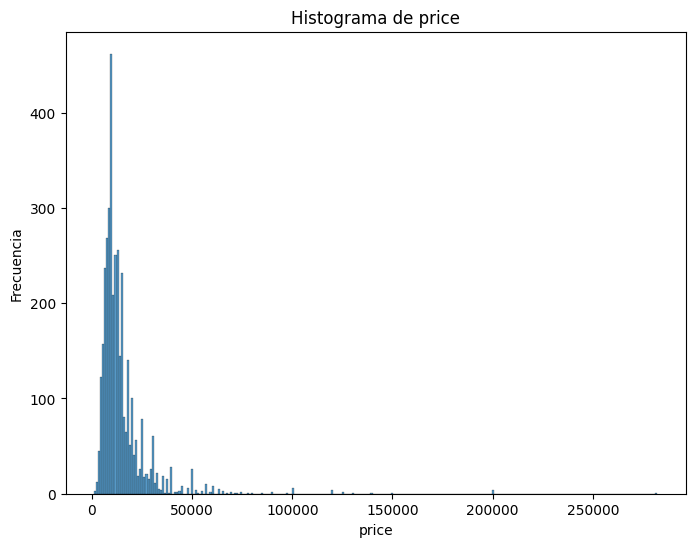

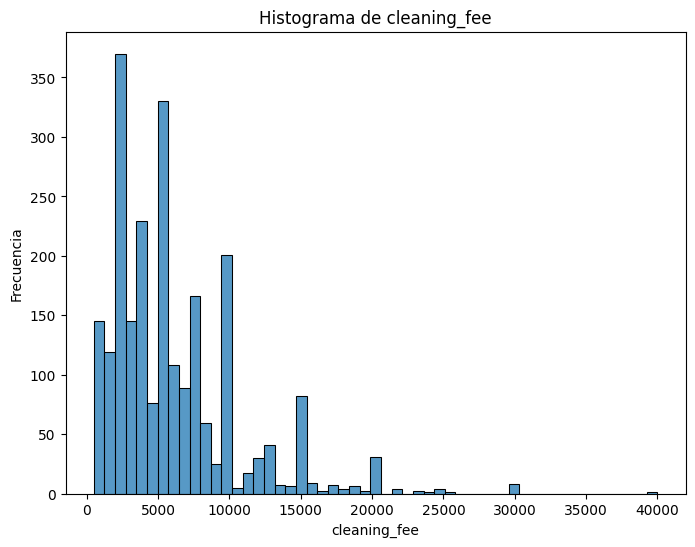

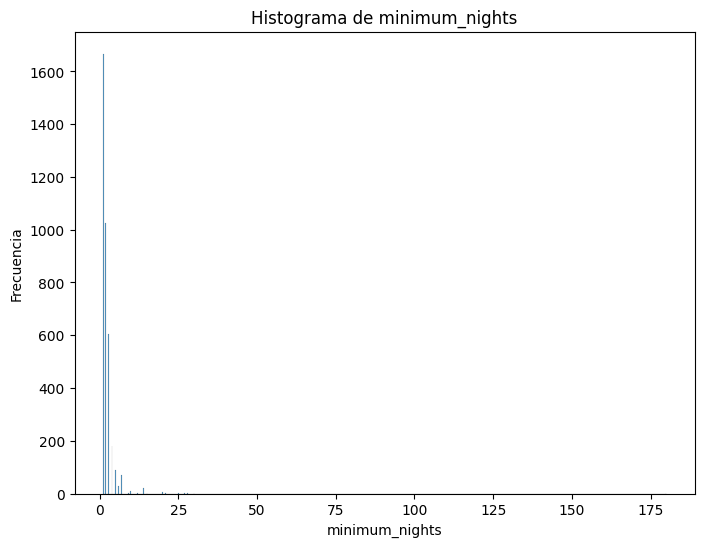

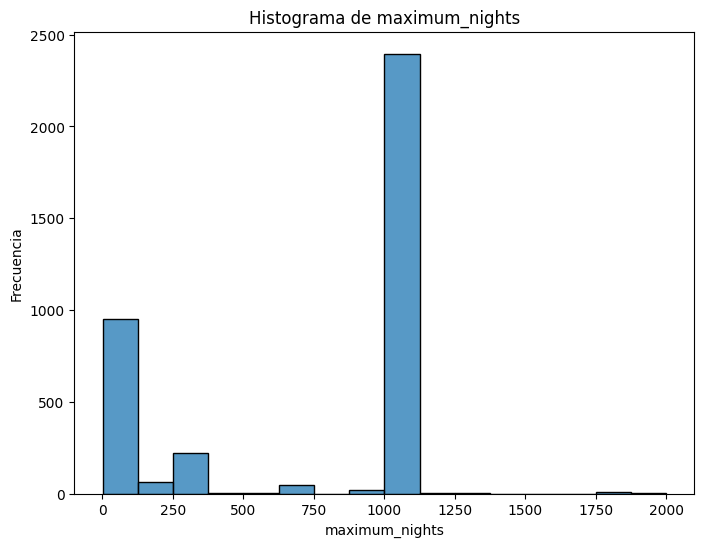

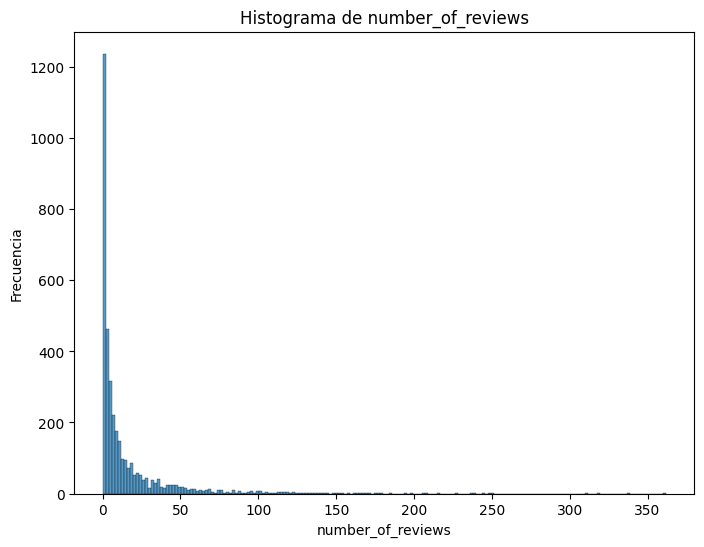

In [ ]:
#Generamos las graficas de barras para decidir si usar media o mediana en la imputacion de los datos
for column in df1.select_dtypes(include=np.number):
  plt.figure(figsize=(8, 6))
  sns.histplot(df1[column], kde=False)
  plt.title(f'Histograma de {column}')
  plt.xlabel(column)
  plt.ylabel('Frecuencia')
  plt.show()

In [ ]:
#Creamos el pipeline el cual imputara los datos nan con la mediana y escalamos los datos con standard scaler
numerico1 = Pipeline([
    ('imputer', SimpleImputer(strategy = 'median')),
    ('scaler', StandardScaler())
])

In [ ]:
# creamos el column transformer con las columnas correspondientes a excepcion de la columna a predecir
preprocessor1 = ColumnTransformer([
    ('numerical', numerico1, ['accommodates','bedrooms','bathrooms','beds','cleaning_fee','minimum_nights','maximum_nights','number_of_reviews'])
])

In [ ]:
#Generamos el modelo knnRegressor pasandole el column transformer
model1 = Pipeline([
    ('preprocessor', preprocessor1),
    ('model', KNeighborsRegressor(n_neighbors=3))
])

model1

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['accommodates', 'bedrooms',
                                                   'bathrooms', 'beds',
                                                   'cleaning_fee',
                                                   'minimum_nights',
                                                   'maximum_nights',
                                                   'number_of_reviews'])])),
                ('model', KNeighborsRegressor(n_neighbors=3))])

In [ ]:
#Generamos el modelo LinearRegressor pasandole el column transformer
model2 = Pipeline([
    ('preprocessor', preprocessor1),
    ('model', LinearRegression())
])

model2

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['accommodates', 'bedrooms',
                                                   'bathrooms', 'beds',
                                                   'cleaning_fee',
                                                   'minimum_nights',
                                                   'maximum_nights',
                                                   'number_of_reviews'])])),
                ('model', LinearRegression())])

In [ ]:
#Generamos el modelo RandomForestRegressor pasandole el column transformer
model3 = Pipeline([
    ('preprocessor', preprocessor1),
    ('model', RandomForestRegressor(max_depth=3))
])

model3

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['accommodates', 'bedrooms',
                                                   'bathrooms', 'beds',
                                                   'cleaning_fee',
                                                   'minimum_nights',
                                                   'maximum_nights',
                                                   'number_of_reviews'])])),
                ('model', RandomForestRegressor(max_depth=3))])

In [ ]:
#asignamos las columnas correspondientes a train y test separandolo por x, y
X_train = train[['accommodates','bedrooms','bathrooms','beds','cleaning_fee','minimum_nights','maximum_nights','number_of_reviews']]
y_train = train['price']
X_test = test[['accommodates','bedrooms','bathrooms','beds','cleaning_fee','minimum_nights','maximum_nights','number_of_reviews']]
y_test = test['price']

# Entrenar y evaluar los modelos
model1.fit(X_train, y_train)
y_pred_model1 = model1.predict(X_test)
r2_model1 = r2_score(y_test, y_pred_model1)

model2.fit(X_train, y_train)
y_pred_model2 = model2.predict(X_test)
r2_model2 = r2_score(y_test, y_pred_model2)

model3.fit(X_train, y_train)
y_pred_model3 = model3.predict(X_test)
r2_model3 = r2_score(y_test, y_pred_model3)

# Imprimir los resultados
print("R2 para KNeighborsRegressor: {r1}".format(r1=r2_model1))
print("R2 para LinearRegression: {r2}".format(r2=r2_model2))
print("R2 para RandomForestRegressor: {r3}".format(r3=r2_model3))

# Identificar casos de sobreajuste o subajuste
if r2_model1 < 0.5:
  print("KNeighborsRegressor: Posible subajuste. El modelo no captura bien la relación entre variables.")
elif r2_model1 > 0.85:
  print("KNeighborsRegressor: Posible sobreajuste. El modelo se adapta demasiado a los datos de entrenamiento.")

if r2_model2 < 0.5:
  print("LinearRegression: Posible subajuste. El modelo no captura bien la relación entre variables.")
elif r2_model2 > 0.85:
  print("LinearRegression: Posible sobreajuste. El modelo se adapta demasiado a los datos de entrenamiento.")

if r2_model3 < 0.5:
  print("RandomForestRegressor: Posible subajuste. El modelo no captura bien la relación entre variables.")
elif r2_model3 > 0.85:
  print("RandomForestRegressor: Posible sobreajuste. El modelo se adapta demasiado a los datos de entrenamiento.")

R2 para KNeighborsRegressor: 0.29066904034474206
R2 para LinearRegression: 0.3277314731707014
R2 para RandomForestRegressor: 0.3026023902608954
KNeighborsRegressor: Posible subajuste. El modelo no captura bien la relación entre variables.
LinearRegression: Posible subajuste. El modelo no captura bien la relación entre variables.
RandomForestRegressor: Posible subajuste. El modelo no captura bien la relación entre variables.


**Conclusiones**

Con base en los valores de R2 proporcionados, el modelo que ofrece la mejor solución es la regresión lineal. Esto se debe a que tiene el mayor valor de R2(0.3277) en comparación con el KNeighborsRegressor (0.2907) y el RandomForestRegressor (0.3032).

El valor de R2 mide la proporción de la varianza en la variable dependiente que es explicada por el modelo donde un valor más cercano a 1 indica un mejor ajuste. Aunque los tres modelos parecen estar en la situación de subajuste (ya que todos tienen R2 relativamente bajos, indicando que no capturan adecuadamente la relación entre las variables), LinearRegression es la que mejor desempeño muestra entre las opciones disponibles.

## **Parte 2**

Para esta parte se utilizarán los resultados de un análisis químico realizado a distintos vinos producidos
en una misma región de Italia, pero provenientes de distintos cultivos. El análisis encontró la presencia
de 13 componentes en 3 diferentes clases de vino. El objetivo es construir un modelo de clasificación que
permita predecir el tipo de vino a partir de sus componentes. Para lograr esto se realizan los siguientes pasos:

In [ ]:
from sklearn.datasets import load_wine
dfvinos = load_wine()

df = pd.DataFrame(dfvinos.data, columns=dfvinos.feature_names)

df['target'] = dfvinos.target

df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

In [ ]:
df.corr()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
alcohol,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720,-0.328222
malic_acid,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011,0.437776
ash,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626,-0.049643
alcalinity_of_ash,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597,0.517859
magnesium,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351,-0.209179
total_phenols,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115,-0.719163
flavanoids,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193,-0.847498
nonflavanoid_phenols,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385,0.489109
proanthocyanins,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417,-0.499130
color_intensity,0.546364,0.248985,0.258887,0.018732,0.199950,-0.055136,-0.172379,0.139057,-0.025250,1.000000,-0.521813,-0.428815,0.316100,0.265668


Se dividen los datos en conjuntos de entrenamiento y pruebas

In [ ]:
from sklearn.model_selection import train_test_split

# Dividir los datos en conjuntos de entrenamiento y pruebas
train_data, test_data = train_test_split(df, test_size=0.2, random_state=42)

# Mostrar la forma de los conjuntos de datos
print("Forma del conjunto de entrenamiento:", train_data.shape)
print("Forma del conjunto de pruebas:", test_data.shape)

Forma del conjunto de entrenamiento: (142, 14)
Forma del conjunto de pruebas: (36, 14)


Se generan los diferentes pipelines para elp rocesamiento numerico

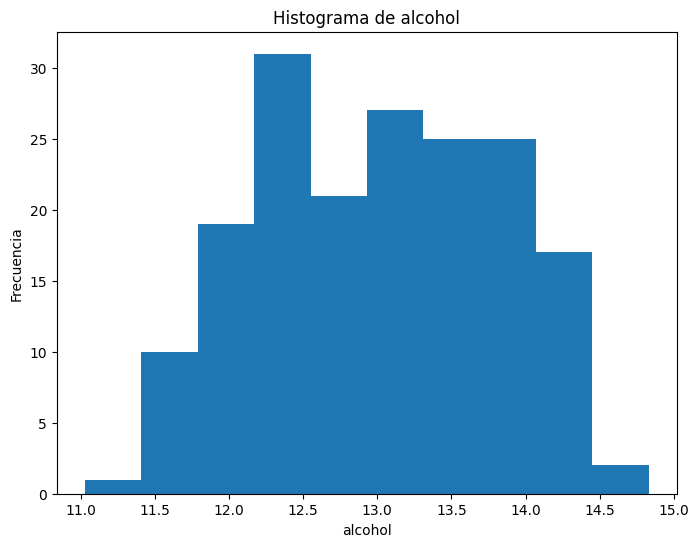

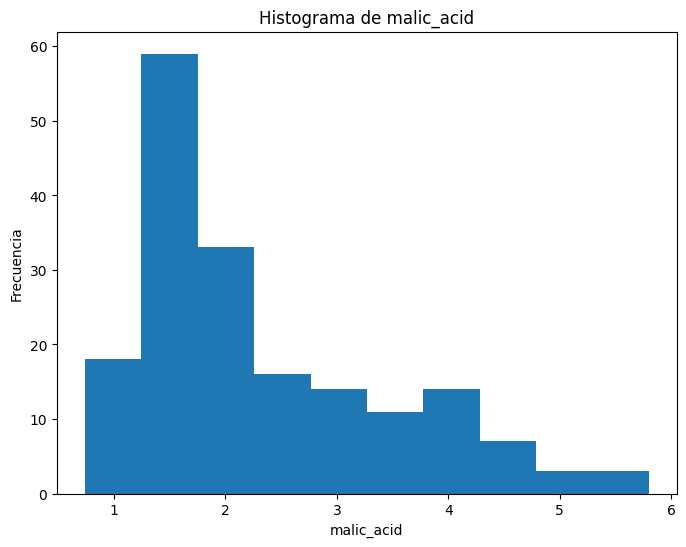

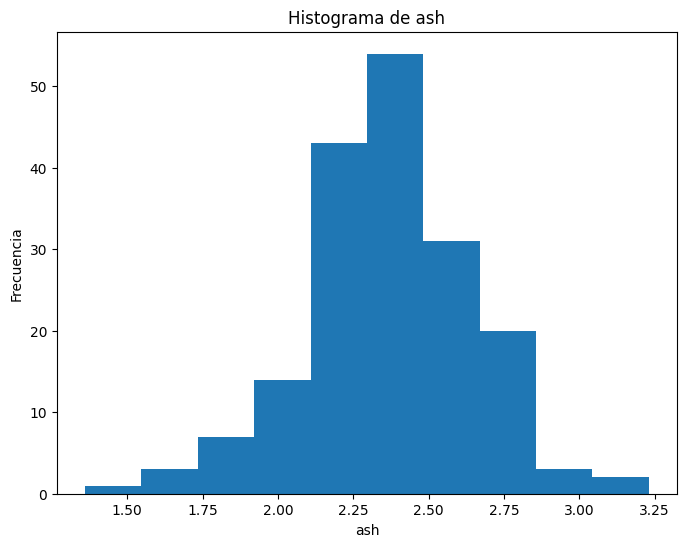

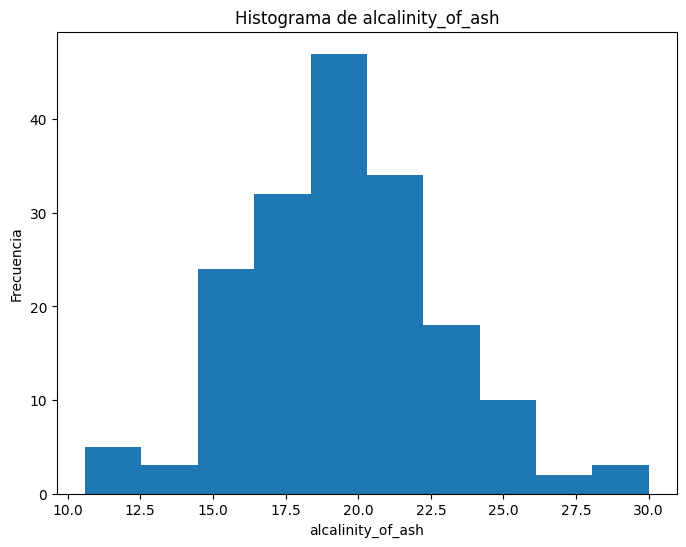

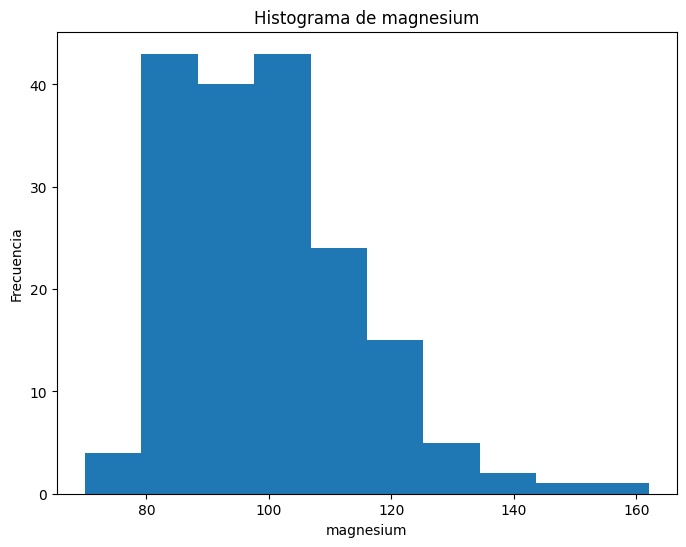

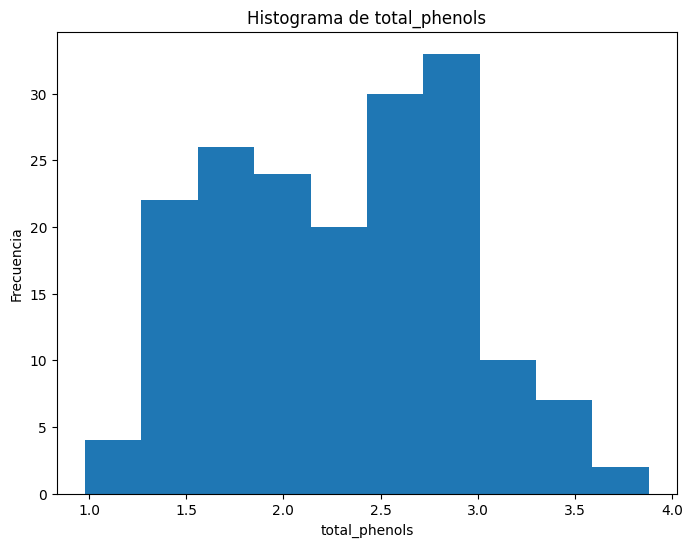

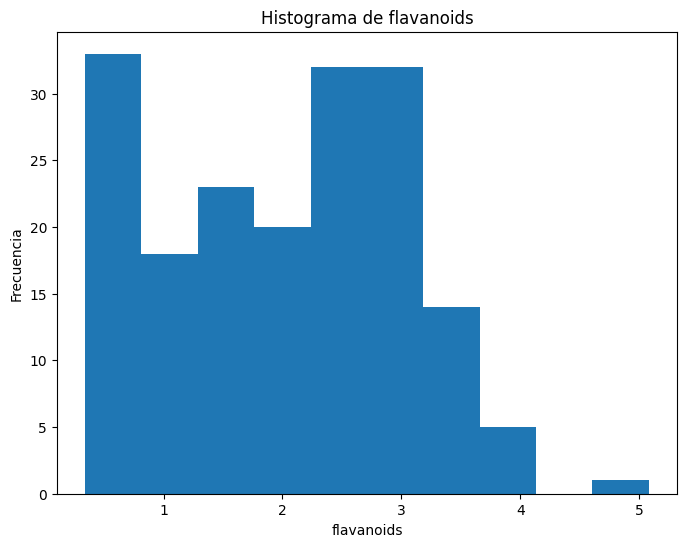

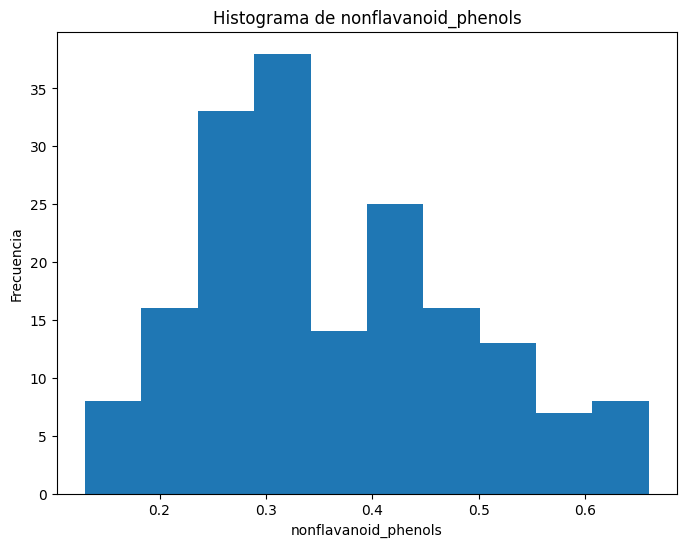

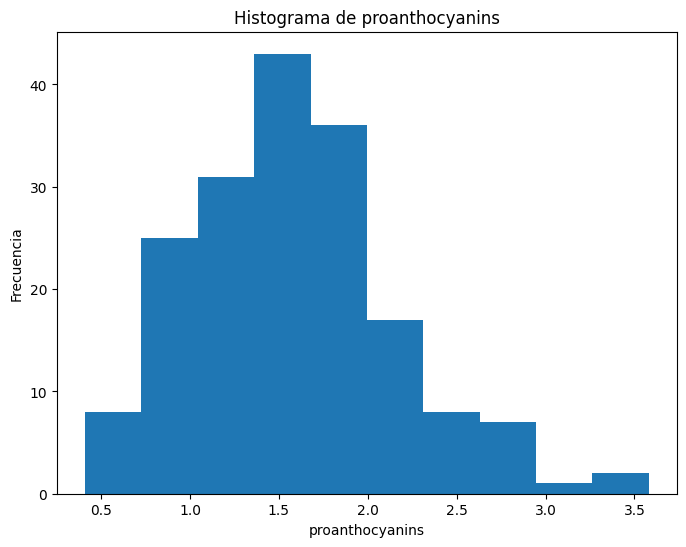

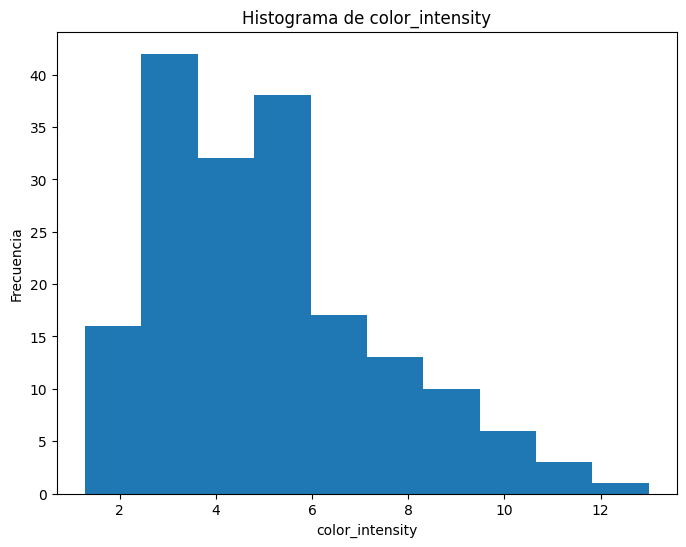

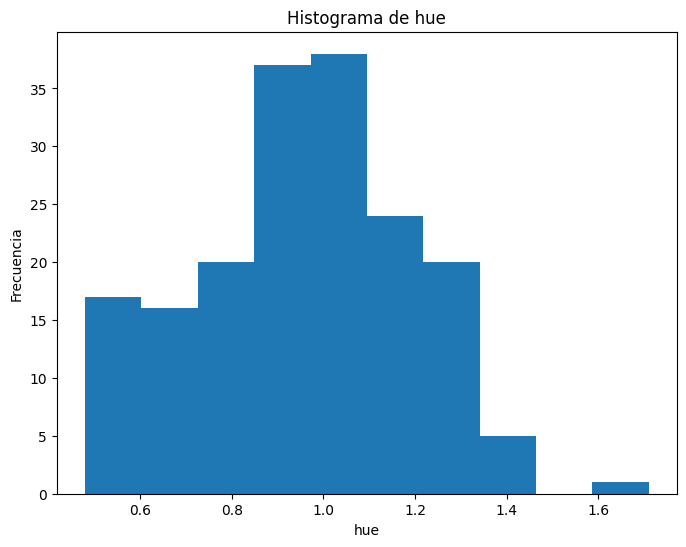

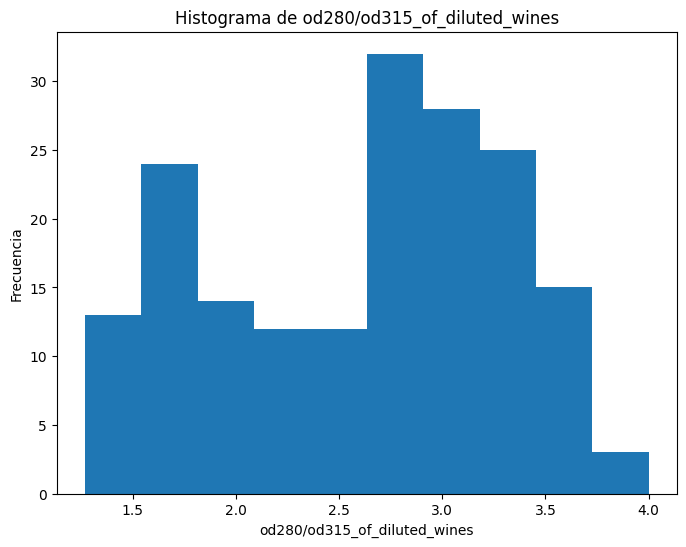

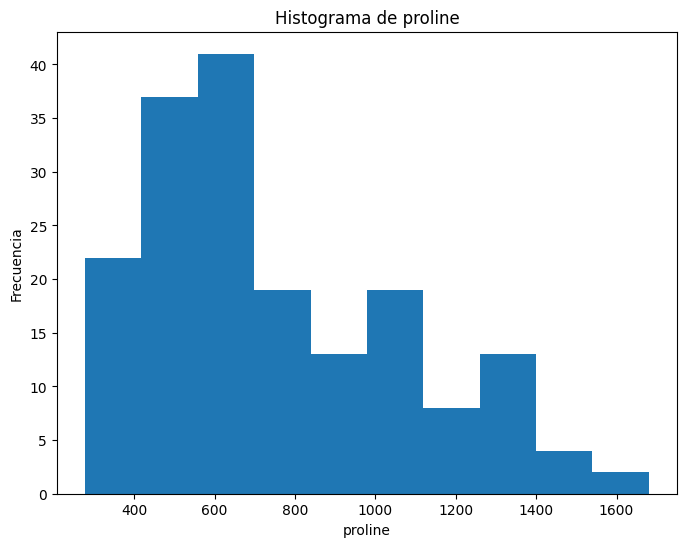

In [ ]:
for column in df.columns:
  if column != 'target':
    plt.figure(figsize=(8, 6))
    plt.hist(df[column], bins=10)
    plt.title(f'Histograma de {column}')
    plt.xlabel(column)
    plt.ylabel('Frecuencia')
    plt.show()

Se crean los diferentes pipelines para el procesamiento de los datos numericos

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
#No se pone imputer ya que no hay datos nulos
numeric_pipeline = Pipeline([
    ('scaler', StandardScaler())
])


In [ ]:
from sklearn.compose import ColumnTransformer

t = ColumnTransformer([
    ('numeric', numeric_pipeline, ['alcohol',	'malic_acid',	'ash',	'alcalinity_of_ash',	'magnesium',	'total_phenols',	'flavanoids',	'nonflavanoid_phenols',	'proanthocyanins',	'color_intensity',	'hue',	'od280/od315_of_diluted_wines','proline'])
])

t

ColumnTransformer(transformers=[('numeric',
                                 Pipeline(steps=[('scaler', StandardScaler())]),
                                 ['alcohol', 'malic_acid', 'ash',
                                  'alcalinity_of_ash', 'magnesium',
                                  'total_phenols', 'flavanoids',
                                  'nonflavanoid_phenols', 'proanthocyanins',
                                  'color_intensity', 'hue',
                                  'od280/od315_of_diluted_wines', 'proline'])])

Se crean los pipelines de los modelos a utilizar

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

pipeline_modelo_1 = Pipeline([
    ('preprocessor', t),
    ('modelo', KNeighborsClassifier(n_neighbors=3))
])

pipeline_modelo_2 = Pipeline([
    ('preprocessor', t),
    ('modelo', RandomForestClassifier(max_depth=3))
])

pipeline_modelo_3 = Pipeline([
    ('preprocessor', t),
    ('modelo', LogisticRegression())
])

pipeline_modelo_1

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['alcohol', 'malic_acid',
                                                   'ash', 'alcalinity_of_ash',
                                                   'magnesium', 'total_phenols',
                                                   'flavanoids',
                                                   'nonflavanoid_phenols',
                                                   'proanthocyanins',
                                                   'color_intensity', 'hue',
                                                   'od280/od315_of_diluted_wines',
                                                   'proline'])])),
                ('modelo', KNeighborsClassifier(n_neighbors=3))])

Por cada modelo se genera la matriz de confusión, el reporte de clasificación y la curva ROC

Matriz de Confusión:
 [[14  0  0]
 [ 1 12  1]
 [ 0  0  8]]
Reporte de Clasificación:
               precision    recall  f1-score   support

           0       0.93      1.00      0.97        14
           1       1.00      0.86      0.92        14
           2       0.89      1.00      0.94         8

    accuracy                           0.94        36
   macro avg       0.94      0.95      0.94        36
weighted avg       0.95      0.94      0.94        36

Modelo: KNeighborsClassifier, Clase: 0, Precisión: 0.93, Recall: 1.00, F1 Score: 0.97
Modelo: KNeighborsClassifier, Clase: 1, Precisión: 1.00, Recall: 0.86, F1 Score: 0.92
Modelo: KNeighborsClassifier, Clase: 2, Precisión: 0.89, Recall: 1.00, F1 Score: 0.94
Matriz de Confusión:
 [[14  0  0]
 [ 0 14  0]
 [ 0  0  8]]
Reporte de Clasificación:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        14
           2       1.00   

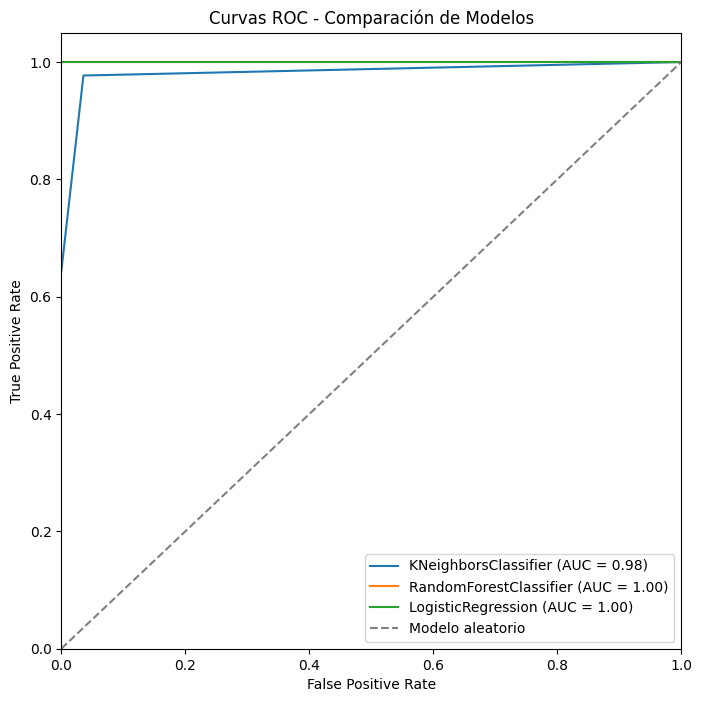

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
import numpy as np

# Binarizar las clases (One-vs-Rest)
y_test_bin = label_binarize(test_data['target'], classes=np.unique(test_data['target']))

# Crear figura para las curvas ROC
fig, ax = plt.subplots(figsize=(8, 8))

# Recorremos cada pipeline y evaluamos
for pipeline in [pipeline_modelo_1, pipeline_modelo_2, pipeline_modelo_3]:
    # Ajustar el modelo
    pipeline.fit(train_data.drop('target', axis=1), train_data['target'])

    # Matriz de confusión
    y_pred = pipeline.predict(test_data.drop('target', axis=1))
    confusion_matrix_result = confusion_matrix(test_data['target'], y_pred)
    print("Matriz de Confusión:\n", confusion_matrix_result)

    # Reporte de clasificación
    print("Reporte de Clasificación:\n", classification_report(test_data['target'], y_pred))

    # Obtener las probabilidades predichas para cada clase
    y_score = pipeline.predict_proba(test_data.drop('target', axis=1))

    # Curva ROC promedio macro (combina todas las clases)
    fpr = dict()
    tpr = dict()
    n_classes = y_test_bin.shape[1]

    # Calculamos las curvas ROC para cada clase
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])

    # Micro average ROC (métrica combinada)
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
    mean_tpr = np.zeros_like(all_fpr)

    for i in range(n_classes):
        mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

    mean_tpr /= n_classes

    # Usar el parámetro multi_class='ovr' (One-vs-Rest) en roc_auc_score
    auc_score = roc_auc_score(y_test_bin, y_score, multi_class='ovr')

    # Graficar la curva ROC directamente
    ax.plot(all_fpr, mean_tpr, label=f'{pipeline.named_steps["modelo"].__class__.__name__} (AUC = {auc_score:.2f})')

    # Análisis adicional: calcular precisión, recall y F1-score para cada clase
    report = classification_report(test_data['target'], y_pred, output_dict=True)

    for class_label, metrics in report.items():
        if class_label not in ['accuracy', 'macro avg', 'weighted avg']:
            precision = metrics['precision']
            recall = metrics['recall']
            f1_score = metrics['f1-score']
            print(f"Modelo: {pipeline.named_steps['modelo'].__class__.__name__}, Clase: {class_label}, "
                  f"Precisión: {precision:.2f}, Recall: {recall:.2f}, F1 Score: {f1_score:.2f}")

# Agregar la línea diagonal punteada de referencia (modelo aleatorio)
ax.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Modelo aleatorio')

# Establecer límites para los ejes
ax.set_xlim([0, 1])
ax.set_ylim([0, 1.05])

plt.title('Curvas ROC - Comparación de Modelos')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()



**Conclusiones:**

**KNeighborsClassifier:**

Precisión: 98%
Matriz de confusión: Existen errores, lo cual sugiere que este modelo no resulta ser perfecto, pero podría estar generalizando mejor; lo que vemos mediante métricas que no llegan al 100% sería un indicativa de que este modelo sí que se está haciendo cargo de la complejidad de los datos sin sobreajustar completamente.

**RandomForestClassifier y LogisticRegression:**

Precisión: 100%
Matriz de confusión: Perfecta, de lo cual se desprende que dicho modelo clasifica correctamente todas las instancias del conjunto de prueba. Sin embargo, el hecho de tener una precisión del 100% para un conjunto de datos pequeño evidencia cierto riesgo de haber sobreadjustado (overfitting), lo cual significa que estos modelos pueden haber memorizado los datos de entrenamiento (es decir, funcionar en el conjunto de prueba) pero fallar al llegar a datos nuevos y no vistos.

**Desicion final segun el anterior razonamiento:**

A pesar de que modelos como el RandomForestClassifier y LogisticRegression podrían mostrar un 100% de precisión, considerándolos perfectos, probablemente estén sobreadjustando, fuertemente enfatizado por el poco tamaño de conjunto de datos que tenías. En este punto parece que el modelo KNeighborsClassifier podría resultar más prometedor ya que sus métricas no son perfectas y podría ser indicador de que este modelo está generalizando mejor y no está memorizando los datos.

